In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem Statement**



A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df=pd.read_csv("train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df_test=pd.read_csv("test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
df1=df.append(df_test)
df1

C:\Users\ksai1\AppData\Local\Temp\ipykernel_8544\1661404988.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df1.drop(['User_ID'],axis=1,inplace=True)

In [8]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
#handling categorical feature
df['Gender']=df['Gender'].map({'F':0,'M':1})
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(df['Age'],drop_first=True)
#df['Age']=df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

#second technique apart from map
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [14]:
df=pd.concat([df,df_city],axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,B,1,1,20,NaN,NaN,368,1,0
550064,1006035,P00375436,0,2,1,C,3,0,20,NaN,NaN,371,0,1
550065,1006036,P00375436,0,2,15,B,4+,1,20,NaN,NaN,137,1,0
550066,1006038,P00375436,0,6,1,C,2,0,20,NaN,NaN,365,0,1


In [15]:
#drop
df.drop('City_Category',axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,20,NaN,NaN,368,1,0
550064,1006035,P00375436,0,2,1,3,0,20,NaN,NaN,371,0,1
550065,1006036,P00375436,0,2,15,4+,1,20,NaN,NaN,137,1,0
550066,1006038,P00375436,0,6,1,2,0,20,NaN,NaN,365,0,1


In [16]:
#Missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [17]:
#Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [19]:
#Replace with mode as with mean it creates new category
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [20]:
df['Product_Category_2'].mode()[0]

8.0

In [21]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
550063     8.0
550064     8.0
550065     8.0
550066     8.0
550067     8.0
Name: Product_Category_2, Length: 550068, dtype: float64

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [24]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3']

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
550063    16.0
550064    16.0
550065    16.0
550066    16.0
550067    16.0
Name: Product_Category_3, Length: 550068, dtype: float64

In [25]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\ksai1\AppData\Local\Temp\ipykernel_8544\3097934778.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace('+','')


0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  B                           550068 non-null  uint8  
 13  C             

In [29]:
#1   Product_ID                  550068 non-null  object convert into int
#convert object into integers
# Replace '4+' with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

# Convert the column to integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  B                           550068 non-null  uint8  
 13  C             

In [32]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  B                           550068 non-null  int32  
 13  C             

<Axes: xlabel='Age', ylabel='Purchase'>

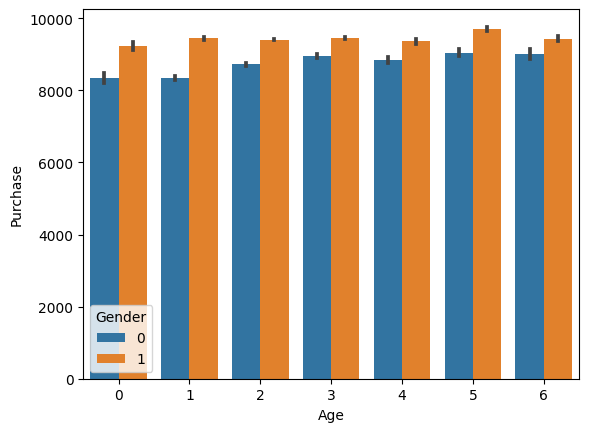

In [39]:

##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)


##Visualisation of age vs purchase
import seaborn as sns
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)


Final observations are

Purchasing power of men is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

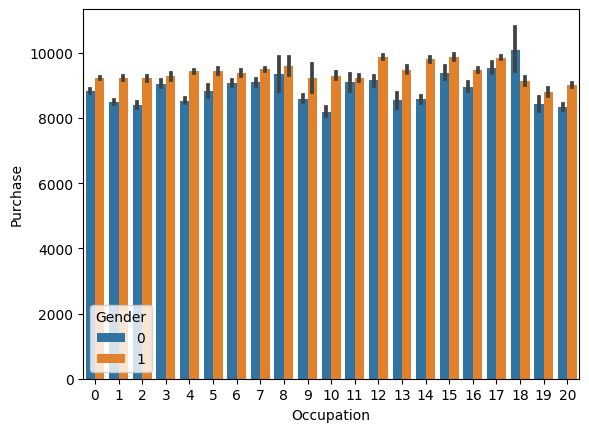

In [40]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

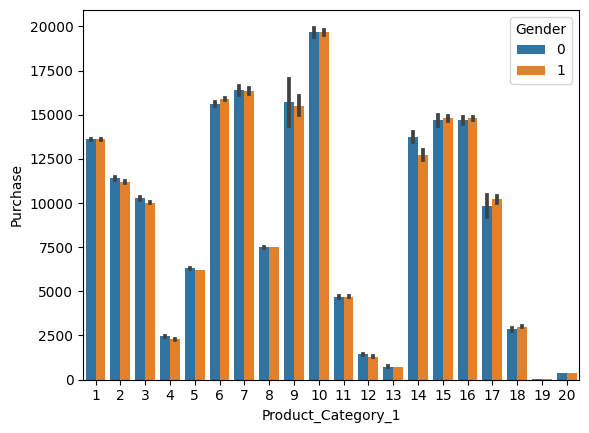

In [41]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

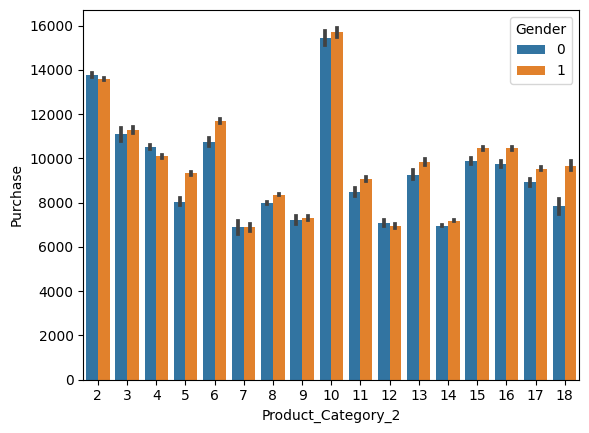

In [42]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

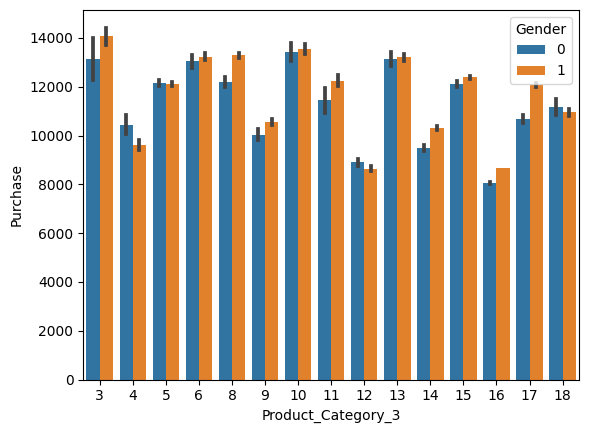

In [43]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [44]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000001,P00069042,0,0,10,2,0,3,8,16,0,0
1,1000001,P00248942,0,0,10,2,0,1,6,14,0,0
2,1000001,P00087842,0,0,10,2,0,12,8,16,0,0
3,1000001,P00085442,0,0,10,2,0,12,14,16,0,0
4,1000002,P00285442,1,6,16,4,0,8,8,16,0,1


In [47]:
X.shape

(550068, 12)

In [48]:
y=df_train['Purchase']

In [49]:
y.shape

(550068,)

In [50]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368545 entries, 396876 to 121958
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     368545 non-null  int64
 1   Gender                      368545 non-null  int64
 2   Age                         368545 non-null  int32
 3   Occupation                  368545 non-null  int64
 4   Stay_In_Current_City_Years  368545 non-null  int32
 5   Marital_Status              368545 non-null  int64
 6   Product_Category_1          368545 non-null  int64
 7   Product_Category_2          368545 non-null  int32
 8   Product_Category_3          368545 non-null  int32
 9   B                           368545 non-null  int32
 10  C                           368545 non-null  int32
dtypes: int32(6), int64(5)
memory usage: 25.3 MB


In [54]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)

In [55]:
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int64 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   Stay_In_Current_City_Years  550068 non-null  int32 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Product_Category_2          550068 non-null  int32 
 9   Product_Category_3          550068 non-null  int32 
 10  Purchase                    550068 non-null  int64 
 11  B                           550068 non-null  int32 
 12  C                           550068 non-null  int32 
dtypes: int32(6), int64(6), object

In [57]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [58]:

## train ur model

In [59]:
X_test

array([[-1.14148486,  0.57141282,  1.84716932, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 1.23908843, -1.75004823,  0.37105599, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.5162369 , -1.75004823,  0.37105599, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [-1.34073479,  0.57141282, -1.10505734, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 1.65033102,  0.57141282,  0.37105599, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [-0.84260996,  0.57141282, -1.10505734, ...,  0.36891877,
         1.17569512, -0.67282374]])